In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

data_path = os.path.join('../data')
csvs_path = os.path.join('../results/csvs')

In [6]:
# parking_data = pd.read_csv(os.path.join(data_path, 'IrvineSpectrumCenter_parking_2022-11_to_2023-03.csv'))
# display(parking_data.head(1))
# parking_data['time_bucket'] = pd.to_datetime(parking_data['dt_start_date'])
# parking_data['time_bucket'] = parking_data['time_bucket'].dt.tz_convert('US/Pacific')
# X = pd.read_csv(os.path.join(csvs_path, 'newest_training_data.csv'))
# X['timestamp'] = pd.to_datetime(X['timestamp'])

# X.set_index('timestamp', inplace=True)
# parking_data.set_index('time_bucket', inplace=True)

# print('parking_data', parking_data.shape)
# display(parking_data.head(1))

# print('X', X.shape)
# display(X.head(1))

In [23]:
# X = pd.read_csv('../results/csvs/training_data_2022-11_to_2023-03.csv')
# X = pd.read_csv('../results/csvs/corrected_training_data_2022-11_to_2023-03.csv')
X = pd.read_csv('../results/csvs/newest_training_data.csv')
parking_data = pd.read_csv('../data/IrvineSpectrumCenter_parking_2022-11_to_2023-03.csv')
lot_ids = list(X['pk_lot'].unique())
parking_data = parking_data[parking_data['pk_lot'].isin(lot_ids)]

# convert timestamp to datetime when the rows have different timezones
X['timestamp'] = pd.to_datetime(X['timestamp'], utc=True)
X['timestamp'] = X['timestamp'].dt.tz_convert('US/Pacific')

# sort by timestamp
X = X.sort_values(by=['timestamp'])
X['timestamp'] = X['timestamp'].dt.tz_convert('US/Pacific')

parking_data['dt_start_date'] = pd.to_datetime(parking_data['dt_start_date'])
parking_data['dt_start_date'] = parking_data['dt_start_date'].dt.round('h')
parking_data['dt_start_date'] = parking_data['dt_start_date'].dt.tz_convert('US/Pacific')
parking_data.drop(columns=['dt_end_date', 'pk_lot_alias', 'f_occupancy_rank'], inplace=True)
X = X.sort_values(by=['timestamp'])
parking_data = parking_data.sort_values(by=['dt_start_date'])

X.set_index('timestamp', inplace=True)
parking_data.set_index('dt_start_date', inplace=True)

display(X.head(10))
display(parking_data.head(10))

,pk_lot,wasserstein,avg_hotspot_distance,avg_log_prob,weighted_hotspot_distance,weighted_log_prob,probe_count,nth_car_time
timestamp,,,,,,,,
2022-11-01 00:00:00-07:00,329825,0.770666,0.011937,14.136364,0.013372,14.045293,0,0 days 06:15:23
2022-11-01 00:00:00-07:00,375750,0.677259,0.022198,14.183468,0.021087,14.171671,0,0 days 06:59:48
2022-11-01 00:00:00-07:00,380308,0.817640,0.025210,13.634860,0.027365,13.617540,0,0 days 06:55:57
2022-11-01 00:00:00-07:00,381380,0.779085,0.016546,13.874935,0.016756,13.904923,0,0 days 06:21:37
2022-11-01 00:00:00-07:00,381381,0.426921,0.026349,13.450704,0.026024,13.449839,0,0 days 06:04:27
2022-11-01 00:00:00-07:00,387459,1.240829,0.012936,13.971685,0.012323,13.975613,0,0 days 06:50:54
2022-11-01 01:00:00-07:00,380308,0.911399,0.025210,13.634860,0.027365,13.617540,0,0 days 07:55:57
2022-11-01 01:00:00-07:00,329825,0.775399,0.011937,14.136364,0.013372,14.045293,0,0 days 07:15:23
2022-11-01 01:00:00-07:00,375750,0.705290,0.022198,14.183468,0.021087,14.171671,0,0 days 07:59:48


,i_avail,i_occ,f_pct_occ,pk_lot,location,geometry
dt_start_date,,,,,,
2022-11-01 00:00:00-07:00,138,NaN,31.0,381380,POINT(-117.74155545543 33.6509462183159),"MULTIPOLYGON (((-117.741726902 33.650923943, -..."
2022-11-01 00:00:00-07:00,1171,NaN,18.0,387459,POINT(-117.739167661281 33.6474458340334),"MULTIPOLYGON (((-117.739180228 33.648147941, -..."
2022-11-01 00:00:00-07:00,197,NaN,18.0,329825,POINT(-117.742706 33.6479646),"MULTIPOLYGON (((-117.74335 33.64835, -117.7420..."
2022-11-01 00:00:00-07:00,212,NaN,5.0,375750,POINT(-117.7398482 33.6484276),"MULTIPOLYGON (((-117.74027 33.64827, -117.7402..."
2022-11-01 00:00:00-07:00,769,NaN,10.0,380308,POINT(-117.744096689923 33.6488428962109),"MULTIPOLYGON (((-117.744053131 33.649582084, -..."
2022-11-01 00:00:00-07:00,1434,NaN,25.0,381381,POINT(-117.743547574184 33.6523127479216),"MULTIPOLYGON (((-117.743790442 33.653241372, -..."
2022-11-01 01:00:00-07:00,138,NaN,31.0,381380,POINT(-117.74155545543 33.6509462183159),"MULTIPOLYGON (((-117.741726902 33.650923943, -..."
2022-11-01 01:00:00-07:00,1171,NaN,18.0,387459,POINT(-117.739167661281 33.6474458340334),"MULTIPOLYGON (((-117.739180228 33.648147941, -..."
2022-11-01 01:00:00-07:00,197,NaN,18.0,329825,POINT(-117.742706 33.6479646),"MULTIPOLYGON (((-117.74335 33.64835, -117.7420..."


In [24]:
lot_ids = list(X['pk_lot'].unique())
lot_ids

[329825, 375750, 380308, 381380, 381381, 387459]

In [25]:
lot_id = random.choice(lot_ids)
start_day = 1 #random.randint(1, 29)
end_day = start_day + 5 # random.randint(start_day + 1, min(30, start_day + 10))
start_time = pd.to_datetime(f'2023-01-{start_day} 00:00:00-08:00')
end_time = pd.to_datetime(f'2023-01-{end_day} 00:00:00-08:00')
print(f'getting data for lot {lot_id} from {start_time} to {end_time}')

getting data for lot 375750 from 2023-01-01 00:00:00-08:00 to 2023-01-06 00:00:00-08:00


In [31]:
# filter by lot
ground_truth_df = parking_data[parking_data['pk_lot'] == lot_id]
X_lot = X[X['pk_lot'] == lot_id].copy()

# wasserstein and avg_hotspot_distance usually between 0 and 1
X_lot['adjusted wasserstein'] = 100 * ((X_lot['wasserstein'] - X_lot['wasserstein'].min()) / (X_lot['wasserstein'].max() - X_lot['wasserstein'].min()))
X_lot['adjusted avg_hotspot_distance'] = 100 * ((X_lot['avg_hotspot_distance'] - X_lot['avg_hotspot_distance'].min()) / (X_lot['avg_hotspot_distance'].max() - X_lot['avg_hotspot_distance'].min()))
X_lot['adjusted avg_log_prob'] = 100 * ((X_lot['avg_log_prob']) - X_lot['avg_log_prob'].min()) / (X_lot['avg_log_prob'].max() - X_lot['avg_log_prob'].min())

# filter by time
ground_truth_df = ground_truth_df[(ground_truth_df.index >= start_time) & (ground_truth_df.index<= end_time)]
X_lot = X_lot[(X_lot.index >= start_time) & (X_lot.index <= end_time)]
print(ground_truth_df.shape)
print(X_lot.shape)

(274, 6)
(121, 11)


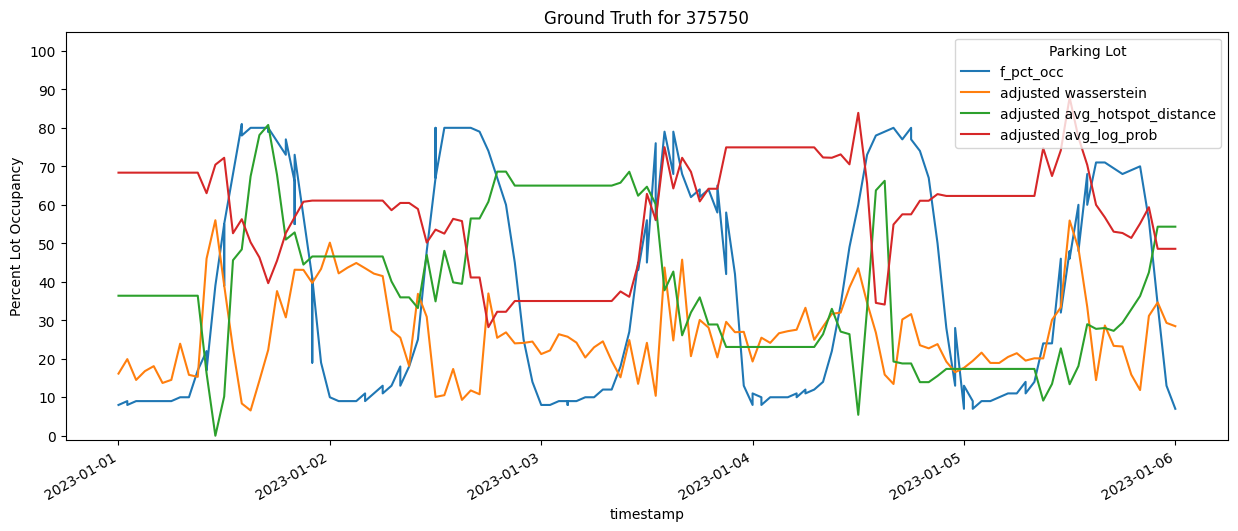

In [32]:
plt.figure(figsize=(15, 6))
ground_truth_df['f_pct_occ'].plot(legend=True)

# plot the wasserstein distance from X as well
X_lot['adjusted wasserstein'].plot(legend=True)

# plot the distance from hotspots
X_lot['adjusted avg_hotspot_distance'].plot(legend=True)

# plot the log probabilities
X_lot['adjusted avg_log_prob'].plot(legend=True)

plt.yticks(np.arange(0, 110, 10))
plt.title(f'Ground Truth for {lot_id}')
plt.ylabel('Percent Lot Occupancy')
plt.legend(title='Parking Lot')
plt.ylim(-1, 105)
plt.show()